In [17]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
data_x=pd.read_csv('C:/Users/banty_ewxe1fw/Desktop/Assignment_4_data/Movie_collection_Independent.csv')

In [20]:
data_y=pd.read_csv('C:/Users/banty_ewxe1fw/Desktop/Assignment_4_data/Movie_collection_Target.csv')

In [21]:
data_x

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,0,0,0,1
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,1,0,0,1


In [22]:
data_y

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000
...,...
501,2.160000
502,2.040000
503,2.260000
504,2.133333


In [23]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test=train_test_split(data_x,data_y,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
x_train.shape

(284, 19)

In [28]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                600       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-2))

C:\Users\banty_ewxe1fw\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [39]:
model_history= model.fit(x_train,y_train,epochs=100,validation_data=(x_valid,y_valid))

Epoch 1/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0518 - val_loss: 0.0915
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0516 - val_loss: 0.0893
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0514 - val_loss: 0.0906
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0510 - val_loss: 0.0900
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0507 - val_loss: 0.0900
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0509 - val_loss: 0.0895
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0505 - val_loss: 0.0898
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0499 - val_loss: 0.0917
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0498 - val_loss: 0.0915
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0497 - val_loss: 0.0903
Epoch 11/100
9/9 [==========

9/9 [==============================] - 0s 6ms/step - loss: 0.0362 - val_loss: 0.0898
Epoch 85/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0362 - val_loss: 0.0907
Epoch 86/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0359 - val_loss: 0.0899
Epoch 87/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0895
Epoch 88/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0895
Epoch 89/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0354 - val_loss: 0.0905
Epoch 90/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0911
Epoch 91/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0354 - val_loss: 0.0899
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0351 - val_loss: 0.0887
Epoch 93/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0350 - val_loss: 0.0891
Epoch 94/100
9/9 [===============

In [40]:
mae_test=model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1909


In [41]:
model_history.history

{'loss': [0.05182488635182381,
  0.051622435450553894,
  0.05136540159583092,
  0.05103376507759094,
  0.05074785649776459,
  0.05085650458931923,
  0.050464749336242676,
  0.04993925988674164,
  0.04980123043060303,
  0.04965762421488762,
  0.04909124597907066,
  0.04948969557881355,
  0.04886053502559662,
  0.04894525930285454,
  0.04804704338312149,
  0.04800219461321831,
  0.04799530282616615,
  0.047630853950977325,
  0.04755494371056557,
  0.04708074405789375,
  0.046969085931777954,
  0.04670863598585129,
  0.04632418975234032,
  0.046230170875787735,
  0.04590151086449623,
  0.04586357623338699,
  0.04557846486568451,
  0.04561742767691612,
  0.04517439752817154,
  0.04526820778846741,
  0.044549860060214996,
  0.044951509684324265,
  0.044360723346471786,
  0.044469259679317474,
  0.04382103309035301,
  0.043581701815128326,
  0.043530456721782684,
  0.04311194270849228,
  0.042879536747932434,
  0.042867276817560196,
  0.04304654523730278,
  0.04255472496151924,
  0.042368065

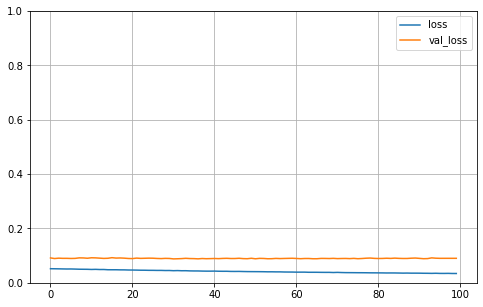

In [42]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [43]:
x_new=x_test[:5]

In [44]:
y_pred=model.predict(x_new)
print(y_pred)
print(y_test[:5])

1/1 [==============================] - 0s 266ms/step
[[2.3990133]
 [2.689603 ]
 [1.7401409]
 [2.4850183]
 [1.7566042]]
     Collection
173    2.240000
274    2.826667
491    1.573333
72     2.186667
452    1.740000


In [46]:
model.save("MovieCollectionPrediction.h5")

In [47]:
x_new=x_test[5:]

In [48]:
y_pred=model.predict(x_new)
print(y_pred)
print(y_test[5:])

4/4 [==============================] - 0s 3ms/step
[[2.4199598]
 [1.6472067]
 [1.7419562]
 [1.9165974]
 [1.8033006]
 [1.9830737]
 [1.7588019]
 [1.3544178]
 [1.7687957]
 [1.6475201]
 [2.2449424]
 [1.5648534]
 [1.5112014]
 [3.365288 ]
 [1.9683151]
 [2.494141 ]
 [2.4236732]
 [2.0186002]
 [2.1423976]
 [1.6950963]
 [1.5977095]
 [2.0355787]
 [1.51734  ]
 [1.745162 ]
 [1.7990952]
 [1.7235324]
 [2.253964 ]
 [2.3013265]
 [1.9438698]
 [1.6528804]
 [1.611845 ]
 [5.265026 ]
 [2.1586652]
 [1.6954846]
 [2.096634 ]
 [1.6436167]
 [2.6148033]
 [3.1906502]
 [1.8855588]
 [2.6387012]
 [1.8502331]
 [1.306558 ]
 [2.5061572]
 [1.555357 ]
 [2.4258783]
 [1.9807289]
 [3.0274   ]
 [1.6417975]
 [2.410949 ]
 [3.583017 ]
 [2.0581784]
 [1.4243605]
 [2.6615705]
 [2.45771  ]
 [1.932003 ]
 [2.4426506]
 [2.6224396]
 [3.254279 ]
 [1.8279643]
 [2.309092 ]
 [1.886704 ]
 [1.7178302]
 [2.4428382]
 [2.5725265]
 [1.6205335]
 [1.6670752]
 [2.5209897]
 [1.3808161]
 [2.1238322]
 [2.0892725]
 [0.9487946]
 [2.2763438]
 [3.8766344]
